In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean, median
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('wage.xlsx')

In [4]:
df.head(10)

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256
5,7,1,1,12,26,9.0,12.0,380166,1,0,...,1,500,0,38.0,85.0,1.0,1.0,8,6.214608,64
6,8,1,1,18,33,14.0,14.0,367470,1,0,...,1,565,0,41.0,119.0,1.0,1.0,9,6.336826,81
7,9,1,1,14,29,14.0,14.0,496635,1,0,...,1,608,0,46.0,108.0,1.0,1.0,9,6.410175,81
8,10,1,1,12,28,12.0,12.0,367772,1,0,...,1,425,0,32.0,96.0,4.0,0.0,10,6.052089,100
9,11,1,1,12,29,12.0,12.0,480445,1,0,...,1,515,0,34.0,97.0,1.0,1.0,11,6.244167,121


In [5]:
df.shape

(3010, 34)

In [6]:
df[df['lwage'] < 0]

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq


In [106]:
nan_values = df.isnull()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns]
for i in columns_with_nan:
    print(i, df[i].isnull().sum())

fatheduc 690
motheduc 353
KWW 47
IQ 949
married 7
libcrd14 13


In [107]:
for i in columns_with_nan:
    df[i].fillna(df[i].mean(), inplace=True)

In [108]:
#Find all column with 'reg66' 
reg66 = df.columns[df.columns.str.contains('reg66')].tolist()
regSum = [sum(df[df[reg] == 1].wage.tolist()) for reg in reg66]
reg66.append('south66')
regSum.append(sum(df[df['south66'] == 1].wage.tolist()))
regDict = dict(zip(reg66, regSum))

In [109]:
regLen = [len(df[df[reg] == 1].wage.tolist()) for reg in reg66]
regLen,sum(regLen), sum(regLen[:-1])

([140, 484, 589, 193, 627, 289, 331, 85, 272, 1247], 4257, 3010)

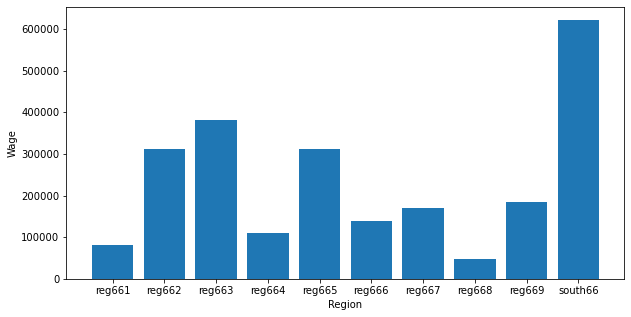

In [110]:
plt.figure(figsize=(10,5))
plt.bar(regDict.keys(), regDict.values())
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [111]:
southReg = []
reg66_2 = reg66[:]
reg66_2.remove('south66')
regSum_2 = regSum[:]
del regSum_2[-1]
regDict2 = dict(zip(reg66_2, regSum_2))
for reg in reg66_2:
    for i in zip(df[reg], df['south66']):
        if i == (1,1):
            southReg.append(reg)
countSouthReg = dict()
for w in southReg:
    countSouthReg[w] = countSouthReg.get(w, 0) + 1
countSouthReg = dict(sorted(countSouthReg.items()))

sum(countSouthReg.values()), countSouthReg
            

(1247, {'reg665': 627, 'reg666': 289, 'reg667': 331})

In [112]:
lst = []
dfNew = df.loc[:,'reg661':'south66'].values.tolist()
for i in dfNew:
    if i[-1] == 1 and np.count_nonzero(i) == 1:
        lst.append(i)

lst


[]

In [113]:
df[df['south66'] == 1].loc[:,'reg661':'south66']

,reg661,reg662,reg663,reg664,reg665,reg666,reg667,reg668,reg669,south66
948,0,0,0,0,1,0,0,0,0,1
1406,0,0,0,0,0,0,1,0,0,1
1407,0,0,0,0,0,0,1,0,0,1
1408,0,0,0,0,0,0,1,0,0,1
1409,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3005,0,0,0,0,0,1,0,0,0,1
3006,0,0,0,0,0,1,0,0,0,1
3007,0,0,0,0,0,1,0,0,0,1
3008,0,0,0,0,0,1,0,0,0,1


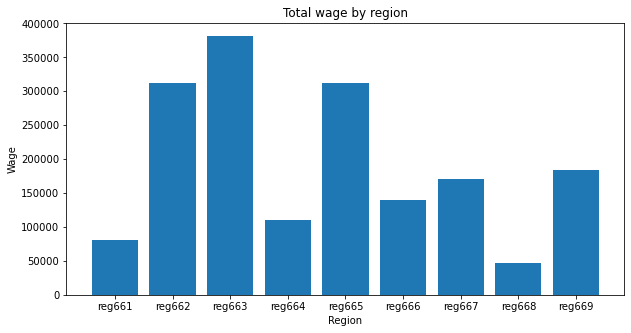

In [114]:
plt.figure(figsize=(10,5))
plt.bar(regDict2.keys(), regDict2.values())
plt.title('Total wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [115]:
regMean = [mean(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]

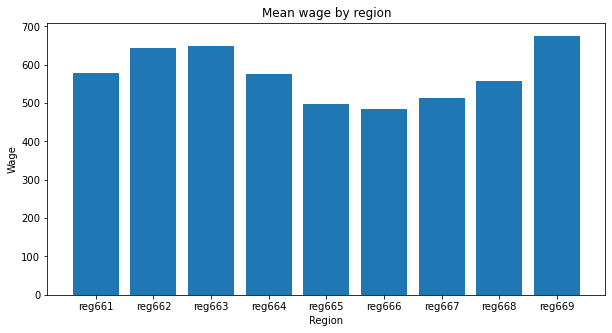

In [116]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMean)
plt.title('Mean wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [117]:
regMax = [max(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]
regMin = [min(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]

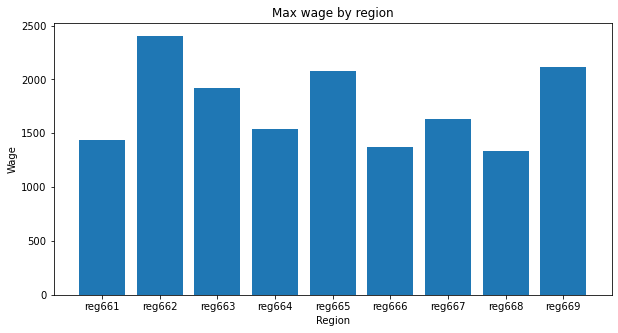

In [118]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMax)
plt.title('Max wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

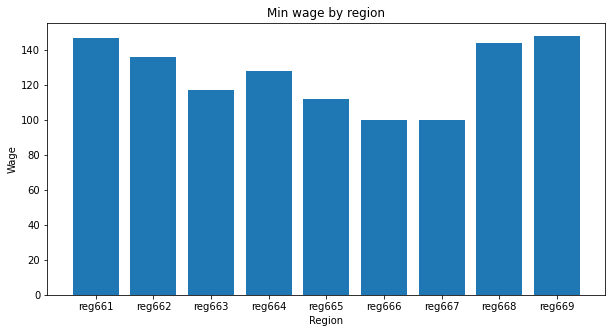

In [119]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMin)
plt.title('Min wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [120]:
totalPeople = [len(df[df[reg] == 1]) for reg in reg66_2]
totalPeople

[140, 484, 589, 193, 627, 289, 331, 85, 272]

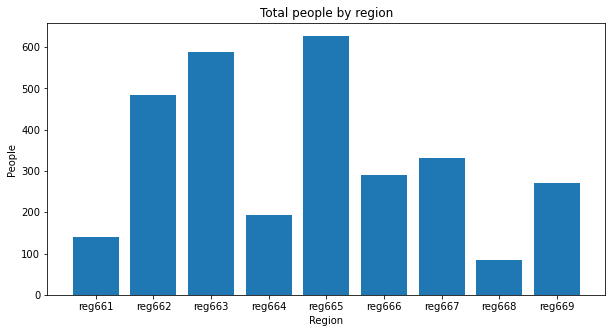

In [121]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, totalPeople)
plt.title('Total people by region')
plt.xlabel('Region')
plt.ylabel('People')
plt.show()

In [122]:
regStd = [np.std(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]
regStd

[244.93526539617338,
 290.53815484629143,
 255.82783238495352,
 222.81170315286596,
 234.36940393993527,
 208.07993821829277,
 242.7024717448821,
 208.71435887024143,
 303.0496021522209]

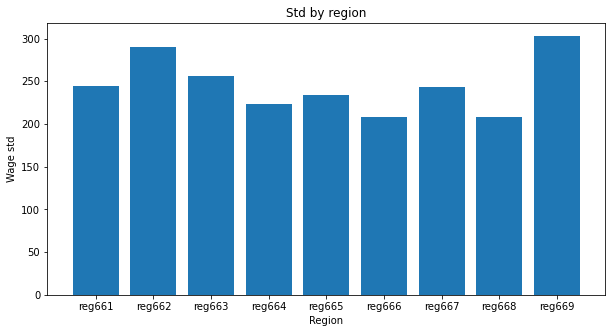

In [123]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regStd)
plt.title('Std by region')
plt.xlabel('Region')
plt.ylabel('Wage std')
plt.show()

In [124]:
regMedian = [median(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]
regMedian

[548.5, 606.0, 630, 542, 452, 438, 450, 538, 631.5]

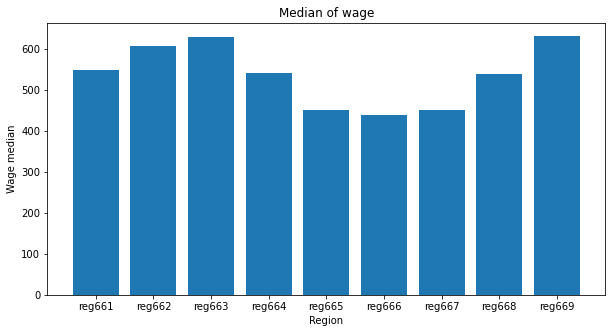

In [125]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMedian)
plt.title('Median of wage')
plt.xlabel('Region')
plt.ylabel('Wage median')
plt.show()

In [126]:
regRange = [max(df[df[reg] == 1].wage.tolist()) - min(df[df[reg] == 1].wage.tolist())  for reg in reg66_2]
regRange

[1295, 2268, 1808, 1410, 1971, 1274, 1535, 1192, 1967]

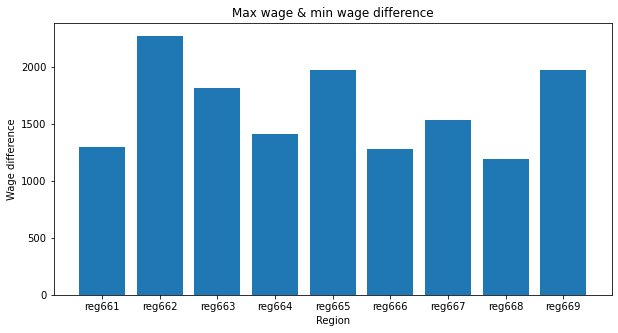

In [127]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regRange)
plt.title('Max wage & min wage difference')
plt.xlabel('Region')
plt.ylabel('Wage difference')
plt.show()

In [128]:
nullKey = []
nullVal = []
for i in columns_with_nan:
    nullKey.append(i)
    nullVal.append(df[i].isnull().sum())
nullKey.append('Total')
nullVal.append(len(df.index))



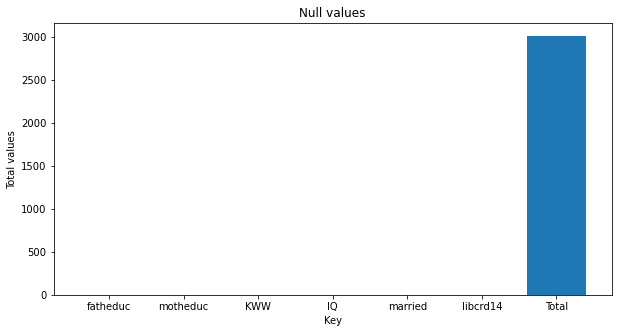

In [129]:
plt.figure(figsize=(10,5))
plt.bar(nullKey, nullVal)
plt.title('Null values')
plt.xlabel('Key')
plt.ylabel('Total values')
plt.show()

In [130]:
x = df['IQ']
y = df['wage']
z = df['exper']
xyz = pd.DataFrame({'IQ': x, 'wage': y, 'exper': z})
print('Correlation')
xyz.corr()

Correlation


,IQ,wage,exper
IQ,1.000000,0.159432,-0.265929
wage,0.159432,1.000000,0.030035
exper,-0.265929,0.030035,1.000000


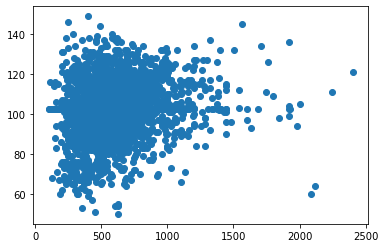

In [131]:
plt.plot(df.wage, df.IQ, 'o')

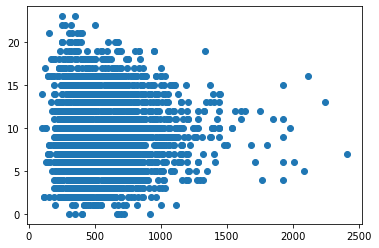

In [132]:
plt.plot(df.wage,df.exper, 'o')

In [133]:
mean(df['IQ'])

102.44978165938865

In [246]:
x_data = df.loc[:, df.columns.difference(['wage', 'lwage'])]
x_data.head(10)

,IQ,KWW,age,black,educ,enroll,exper,expersq,fatheduc,id,...,reg667,reg668,reg669,sinmom14,smsa,smsa66,south,south66,step14,weight
0,102.449782,15.0,29,1,7,0,16,256,10.003448,2,...,0,0,0,0,1,1,0,0,0,158413
1,93.000000,35.0,27,0,12,0,9,81,8.000000,3,...,0,0,0,0,1,1,0,0,0,380166
2,103.000000,42.0,34,0,12,0,16,256,14.000000,4,...,0,0,0,0,1,1,0,0,0,367470
3,88.000000,25.0,27,0,11,0,10,100,11.000000,5,...,0,0,0,0,1,1,0,0,0,380166
4,108.000000,34.0,34,0,12,0,16,256,8.000000,6,...,0,0,0,0,1,1,0,0,0,367470
5,85.000000,38.0,26,0,12,0,8,64,9.000000,7,...,0,0,0,0,1,1,0,0,0,380166
6,119.000000,41.0,33,0,18,0,9,81,14.000000,8,...,0,0,0,0,1,1,0,0,0,367470
7,108.000000,46.0,29,0,14,0,9,81,14.000000,9,...,0,0,0,0,1,1,0,0,0,496635
8,96.000000,32.0,28,0,12,0,10,100,12.000000,10,...,0,0,0,0,1,1,0,0,0,367772
9,97.000000,34.0,29,0,12,0,11,121,12.000000,11,...,0,0,0,0,1,1,0,0,0,480445


In [247]:
y_data = df.loc[:, 'wage']
y_data.head(10)

0    548
1    481
2    721
3    250
4    729
5    500
6    565
7    608
8    425
9    515
Name: wage, dtype: int64

In [239]:
x_data = StandardScaler().fit_transform(x_data)
x_data

array([[ 0.        , -2.17035768,  0.28069618, ..., -0.84102145,
        -0.20110308, -0.95401883],
       [-0.74059582,  0.17082836, -0.3569608 , ..., -0.84102145,
        -0.20110308,  0.34568999],
       [ 0.04312157,  0.99024347,  1.87483864, ..., -0.84102145,
        -0.20110308,  0.2712779 ],
       ...,
       [ 0.513352  , -0.99976466, -1.31344628, ...,  1.18903032,
        -0.20110308, -1.35926461],
       [ 0.35660852, -0.18034955,  0.91835316, ...,  1.18903032,
        -0.20110308, -1.23556682],
       [ 0.        , -0.76564606, -0.6757893 , ...,  1.18903032,
        -0.20110308, -1.40726673]])

In [248]:
pca = PCA(n_components=0.9)
pca.fit(x_data)

PCA(n_components=0.9)

In [249]:
x_data = pca.transform(x_data)
x_data

array([[-162766.1053036 ],
       [  58986.3448739 ],
       [  46290.37134245],
       ...,
       [-231919.5602815 ],
       [-210814.61726846],
       [-240109.55137713]])

In [260]:
poly = PolynomialFeatures(degree=8)

In [261]:
x_poly = poly.fit_transform(x_data)

In [262]:
x_train, x_test = train_test_split(x_poly, test_size=0.2, random_state=0)
x_train

array([[ 1.00000000e+00,  5.44830676e+04,  2.96840466e+09, ...,
         2.61558786e+28,  1.42505251e+33,  7.76412320e+37],
       [ 1.00000000e+00,  4.39150842e+05,  1.92853462e+11, ...,
         7.17269428e+33,  3.14989473e+39,  1.38327893e+45],
       [ 1.00000000e+00,  5.89860602e+04,  3.47935530e+09, ...,
         4.21207735e+28,  2.48453848e+33,  1.46553136e+38],
       ...,
       [ 1.00000000e+00, -2.34687179e+05,  5.50780721e+10, ...,
         1.67084511e+32, -3.92125926e+37,  9.20269274e+42],
       [ 1.00000000e+00,  1.16895145e+05,  1.36644750e+10, ...,
         2.55140177e+30,  2.98246480e+35,  3.48635656e+40],
       [ 1.00000000e+00, -2.08709548e+05,  4.35596756e+10, ...,
         8.26521033e+31, -1.72502831e+37,  3.60029881e+42]])

In [263]:
x_test

array([[ 1.00000000e+00, -2.42676853e+05,  5.88920551e+10, ...,
         2.04253792e+32, -4.95676676e+37,  1.20289256e+43],
       [ 1.00000000e+00,  8.94489045e+04,  8.00110651e+09, ...,
         5.12212479e+29,  4.58168451e+34,  4.09826660e+39],
       [ 1.00000000e+00,  3.71668764e+04,  1.38137670e+09, ...,
         2.63594522e+27,  9.79698503e+31,  3.64123332e+36],
       ...,
       [ 1.00000000e+00,  3.12796215e+04,  9.78414724e+08, ...,
         9.36631888e+26,  2.92974910e+31,  9.16414430e+35],
       [ 1.00000000e+00,  9.62273478e+04,  9.25970246e+09, ...,
         7.93946239e+29,  7.63993409e+34,  7.35170594e+39],
       [ 1.00000000e+00,  3.71679197e+04,  1.38145425e+09, ...,
         2.63638920e+27,  9.79891019e+31,  3.64205107e+36]])

In [264]:
y_train, y_test = train_test_split(y_data.to_numpy(), test_size=0.2, random_state=0)

In [265]:
y_train

array([369, 466, 600, ..., 127, 423, 250], dtype=int64)

In [266]:
y_test

array([ 300,  625,  455,  250,  625,  450,  710,  404,  580,  529,  565,
        625,  325,  445,  769,  625,  365,  517,  500,  543,  400,  452,
        933,  761, 1155,  433,  300,  624, 1026,  647,  650,  697,  548,
        923,  364,  846,  220, 1050,  721,  726,  692,  308,  400,  625,
        535, 1265,  919,  208,  604,  400,  727,  225,  700,  250,  677,
        409,  398,  823,  688,  476,  693,  202,  549,  423,  347,  400,
        365, 1167,  136,  400,  625,  425,  300,  350,  543,  425,  299,
        393,  350,  817,  721,  575,  555,  355,  155,  625,  486,  250,
        656, 1039,  430,  265,  684,  452,  595,  509,  962,  417,  547,
        577,  424,  385,  400,  520,  285,  695,  250, 1049,  481,  350,
        240,  385,  225,  646,  220,  275,  393,  656,  462,  462,  479,
        447,  418,  750,  711,  600,  275,  433,  601,  673,  470, 1000,
        745,  307,  423,  390,  615,  300, 2083,  786,  865,  800,  600,
        325,  726,  230,  250,  375,  746,  287,  4

In [267]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [268]:
y_pred = model.predict(x_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
poly_reg_rmse

270.45575886925286